### Capstone Project 2: Predicting Churning Credit Card Customer - Modeling

### 1. Introduction

#### 1.1 The problem:
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. 
He realized that the traditional approach of choosing a credit card for a customer needs to change. He has decided to study all the other features of a user and not just income to help them choose a more suitable card for each user.

The task is to build a predictive model, which can identify credit card customers who are getting chruned. In addition, we will also need to determine some of the most influential factors that can lead to a customer's decision of leaving their credit card issuer.

#### 1.2. The Data

The datase is from the Kaggle website. This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

- CLIENTNUM: Client number. Unique identifier for the customer holding the account<br />
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)<br />
- Customer_Age: Demographic variable - Customer's Age in Years <br />
- Gender: Demographic variable - M=Male, F=Female<br />
- Dependent_count: Demographic variable - Number of dependents<br />
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)<br />
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown<br />
- Income_Category: Demographic variable - Annual Income Category of the account holder ( 40𝐾, 40K - 60K, 60𝐾− 80K, 80𝐾− 120K, 120K, Unknown)<br />
- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)<br />
- Months_on_book: Period of relationship with bank<br />
- Total_Relationship_Count: Total no. of products held by the customer<br />
- Months_Inactive_12_mon: No. of months inactive in the last 12 months<br />
- Contacts_Count_12_mon: No. of Contacts in the last 12 months <br />
- Credit_Limit: Credit Limit on the Credit Card <br />
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card <br />
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) <br />
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) <br />
- Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br />
- Total_Trans_Ct: Total Transaction Count (Last 12 months) <br />
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) <br />
- Avg_Utilization_Ratio: Average Card Utilization Ratio <br />



### 2. Import necessary libraries and the data:

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv('C:/Users/vumac/Desktop/Springboard_Capstone2/Dataset/BankChurners_cleaned.csv', index_col=0)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than 40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 3. Pre-processing for training

In [3]:
# Per previous EDA notebook, Education_Level, Marital_Status and Income_Category have no relationship with the target feature
# Fill missing value with 'Other'
df.fillna('Other', inplace=True)

In [4]:
# Convert Atttrition Flag to 0 for Existing Customer and 1 for Attrited Customer
df['Attrition_Flag'] = df.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})

In [5]:
# One Hot Encoding for categorical features
#df_feature = pd.get_dummies(df, columns=['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

# Label Encoding for categorical features
enc = LabelEncoder()
df.Gender = enc.fit_transform(df['Gender'])
df.Education_Level = enc.fit_transform(df['Education_Level'])
df.Marital_Status = enc.fit_transform(df['Marital_Status'])
df.Income_Category = enc.fit_transform(df['Income_Category'])
df.Card_Category = enc.fit_transform(df['Card_Category'])

In [6]:
# Create X and y dataset for independent variables and dependent variable
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [7]:
# Create training and testing set
# The dataset is imbalanced, so we will set 'stratify' to make train and test set have the same proportion of churn and no churn customers 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify=y)

In [8]:
# Address imbalance problem
# In this dataset, SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.
# We oversample the examples in the minority class, then undersample the examples in the majority class in the training dataset
# This can balance the class distribution but does not provide any additional information to the model.

over = SMOTE(sampling_strategy=0.3)
X_train, y_train = over.fit_resample(X_train, y_train) 

under = RandomUnderSampler(sampling_strategy=1)
X_train, y_train = under.fit_resample(X_train, y_train) 

y_train.value_counts()

1    1784
0    1784
Name: Attrition_Flag, dtype: int64

In [9]:
# Apply StandardScaler to X_train, X_test

# List of numeric columns to apply StandardScaler
numeric_col = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
               'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
               'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Fit StandardScaler to training set
scaler = StandardScaler()
scaler.fit(X_train[numeric_col].values)

# Create copies of training and testing set
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Transform and assign scaled values to train and test set
X_train_scaled[numeric_col] = scaler.transform(X_train[numeric_col].values)
X_test_scaled[numeric_col] = scaler.transform(X_test[numeric_col].values)

### 4. Apply Machine Learning Models:

We will apply the following classification models:
- K-Nearest Neighbor (KNN)
- Logistic Regression
- Support vector machine (SVM)
- Random Forest
- Gradient Boost

We will use the cross validation technique to evaluate the performance of each model. In addition, each model will be assessed by a number of evaluation metrics for performance review. 

Evaluation metrics:
- Accuracy
- Precision
- Recall
- Confusion Matrix

Our top priority in this business problem is to identify customers who are getting churned. Even if we predict non-churning customers as churned, it won't harm the business. But predicting churning customers as Non-churning will do. So we will put more emphasis in the recall metric.

#### 4.1 K-Nearest Neighbor (KNN)

Accuracy: 0.8206646923330043


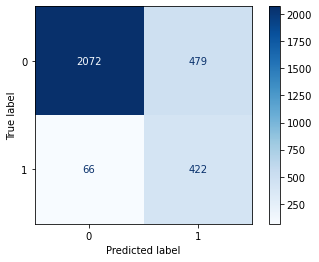

In [10]:
# KNN model with default parameter (n_neighbors=5)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
y_pred = knn_clf.predict(X_test_scaled)

print('Accuracy:', knn_clf.score(X_test_scaled, y_test))
plot_confusion_matrix(knn_clf, X_test_scaled, y_test, cmap='Blues');

In [11]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2551
           1       0.47      0.86      0.61       488

    accuracy                           0.82      3039
   macro avg       0.72      0.84      0.75      3039
weighted avg       0.89      0.82      0.84      3039



In [12]:
# Cross validation scores

cv_scores = cross_val_score(knn_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.8666120585681677
cv_std: 0.030638841976347038


K-Nearest Neighbor model has a good accuracy score without any tuning yet. In addition, KNN has a good recall score of 86% on predicting churn customers, which is an important metric for this project. 
However, the precision score for churn customers is only 47%. The model may predict a lot more churn customers than actual.

#### 4.2 Logistic Regression

Accuracy: 0.8394208621256992


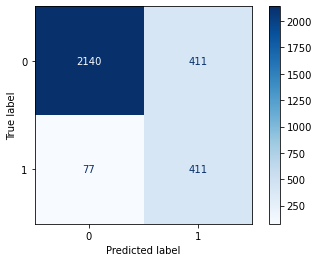

In [13]:
# Logistic regression model with default parameter

lg_clf= LogisticRegression(random_state=19)
lg_clf.fit(X_train_scaled, y_train)
y_pred = lg_clf.predict(X_test_scaled)

print('Accuracy:', lg_clf.score(X_test_scaled, y_test))
plot_confusion_matrix(lg_clf, X_test_scaled, y_test, cmap='Blues');

In [14]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2551
           1       0.50      0.84      0.63       488

    accuracy                           0.84      3039
   macro avg       0.73      0.84      0.76      3039
weighted avg       0.89      0.84      0.85      3039



In [15]:
# Cross validation scores

cv_scores = cross_val_score(lg_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.8548343881732215
cv_std: 0.02119261754258412


Logistic regression classifier has a slightly better performance than KNN. Howiever, Logistic regression model has lower recall score on predicting churn customers.

#### 4.3 Support Vector Machine (SVM)

Accuracy: 0.8877920368542284


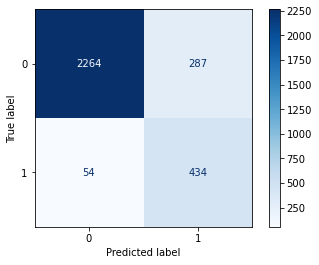

In [16]:
# SVM model with default parameter

svm_clf = SVC(probability=True, random_state=19)
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

print('Accuracy:', svm_clf.score(X_test_scaled, y_test))
plot_confusion_matrix(svm_clf, X_test_scaled, y_test, cmap='Blues');

In [17]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2551
           1       0.60      0.89      0.72       488

    accuracy                           0.89      3039
   macro avg       0.79      0.89      0.82      3039
weighted avg       0.92      0.89      0.90      3039



In [18]:
# Cross validation scores

cv_scores = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.9075213816241785
cv_std: 0.015873749933636504


SVM classifier has a good accuracy scores overall. In addition, it also has a 89% recall score on predicting churn customers. However, the model still failed to classify 54 churn customers.

#### 4.4 Random Forest

Accuracy: 0.9559065482066469


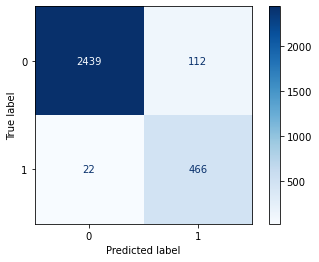

In [36]:
# Random Forest model with default parameter

rf_clf = RandomForestClassifier(random_state=19)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)

print('Accuracy:', rf_clf.score(X_test_scaled, y_test))
plot_confusion_matrix(rf_clf, X_test_scaled, y_test, cmap='Blues');

In [20]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2551
           1       0.81      0.95      0.87       488

    accuracy                           0.96      3039
   macro avg       0.90      0.96      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [21]:
# Cross validation scores

cv_scores = cross_val_score(rf_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.9517967635862199
cv_std: 0.006762544161385544


So far, Random Forest is the best model. Overall accuracy score is 95%. Most importantly, the model resulted in a 95% recall score on predicting churn customer. It is very close to identify all churn customers.

#### 4.4 Gradient Boosting

Accuracy: 0.9529450477130635


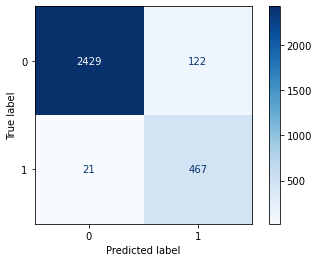

In [22]:
# Random Forest model with default parameter

gb_clf = GradientBoostingClassifier(random_state=19)
gb_clf.fit(X_train_scaled, y_train)
y_pred = gb_clf.predict(X_test_scaled)

print('Accuracy:', gb_clf.score(X_test_scaled, y_test))
plot_confusion_matrix(gb_clf, X_test_scaled, y_test, cmap='Blues');

In [23]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2551
           1       0.79      0.96      0.87       488

    accuracy                           0.95      3039
   macro avg       0.89      0.95      0.92      3039
weighted avg       0.96      0.95      0.95      3039



In [24]:
# Cross validation scores

cv_scores = cross_val_score(gb_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.9489972145941126
cv_std: 0.011750548959812408


Gradient Boosting performance was comparable with Random Forest model. Both performed very well in predicting churn customers. 

### 5. Comparison of the models

In [25]:
# Compare models on accuracy, recall and roc_auc scores

models = [knn_clf, lg_clf, svm_clf, rf_clf, gb_clf]
model_names =['KNN', 'LogisticRegression', 'SVM', 'RandomForestClassifier', 'GradientBoostingClassifier']

accuracy = []
precision = []
recall = []
roc_auc = []

for model in models:
    accuracy.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    precision.append(precision_score(y_test, model.predict(X_test_scaled)))    
    recall.append(recall_score(y_test, model.predict(X_test_scaled)))
    roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))
    
pd.DataFrame({'Model':model_names, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC_AUC':roc_auc})

,Model,Accuracy,Precision,Recall,ROC_AUC
0,KNN,0.820665,0.468368,0.864754,0.910709
1,LogisticRegression,0.839421,0.500000,0.842213,0.924916
2,SVM,0.887792,0.601942,0.889344,0.955177
3,RandomForestClassifier,0.955907,0.806228,0.954918,0.989091
4,GradientBoostingClassifier,0.952945,0.792869,0.956967,0.991394


We see in both the above matrix that Random Forest and Gradient Boosting are the two best performance models. Both of the models have very high accuracy score and a good recall score. 

On the other hand, both models only have a precison score of 80. The models may predict more churn customers than actual. However, the important metric for this project is recall, which helps the business to identify all potential churn customers. Predicting incorrectly some churn customers will not harm the business. 

### 6. Tuning Hyperparameters

#### 6.1 Parameter Tuning for Random Forest


In [26]:
# Initiate Random Forest Classifier
rf = RandomForestClassifier(max_features='auto', n_jobs=-1, random_state=19)

# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(100, 1000, 5)]

# Maximum depth of each tree
max_depth = [int(i) for i in np.linspace(10, 100, 10)]

# Create the param grid
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Apply GridSearchCV
rf_grid = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1, random_state=19)
rf_grid.fit(X_train_scaled, y_train)
              
print(rf_grid.best_params_) 
print(rf_grid.best_score_)

{'n_estimators': 1000, 'max_depth': 50}
0.9537571550359274


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2551
           1       0.80      0.95      0.87       488

    accuracy                           0.95      3039
   macro avg       0.89      0.95      0.92      3039
weighted avg       0.96      0.95      0.95      3039


 Confusion Matrix


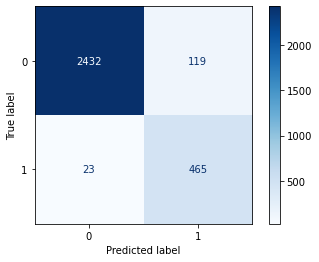

In [27]:
# Classification report and confusion matrix

print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test_scaled)))
print('\n Confusion Matrix')
plot_confusion_matrix(rf_grid, X_test_scaled, y_test, cmap='Blues');

In [28]:
# Cross validation scores

cv_scores = cross_val_score(rf_grid.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.9537571550359274
cv_std: 0.007349322798464092


There is no clear improvement after tuning the model.

ROC_AUC score 0.9899316243710279


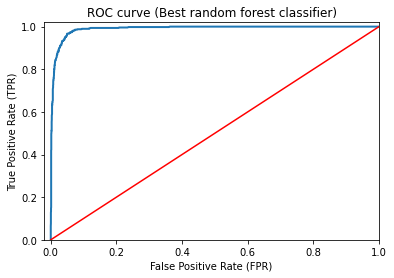

In [29]:
print('ROC_AUC score', roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1]))

fpr, tpr, threshold = roc_curve(y_test, rf_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r')
plt.axis([-0.02, 1, 0, 1.02])
plt.xlabel('False Positive Rate (FPR)', fontsize=10)
plt.ylabel('True Positive Rate (TPR)', fontsize=10)
plt.title('ROC curve (Best random forest classifier)');

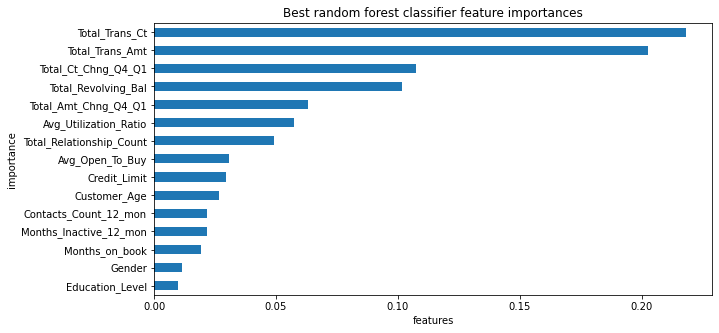

In [30]:
# Plot 15 most important features to predict churn customers

plt.figure(figsize=(10, 5))
imps = rf_grid.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values()
rf_feat_imps[-15:].plot(kind='barh')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

As expected in the EDA step:
- The most important features to predict churn customers are: Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1.
    
- The categorical features do not have much impact in predicting churn customers.

#### 6.2 Parameter Tuning for Gradient Boosting


In [31]:
gb_clf = GradientBoostingClassifier(max_features='auto', random_state=19)
param_grid = {
        'n_estimators' : [100, 200, 300],
        'learning_rate': [0.1, 0.5, 1],
        'max_depth': [4, 8]
        }
gb_grid = RandomizedSearchCV(gb_clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, random_state=19)
gb_grid.fit(X_train_scaled, y_train)

print(gb_grid.best_params_)
print(gb_grid.best_score_)

{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.5}
0.9677702216931653


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2551
           1       0.84      0.95      0.89       488

    accuracy                           0.96      3039
   macro avg       0.92      0.96      0.94      3039
weighted avg       0.97      0.96      0.96      3039


 Confusion Matrix


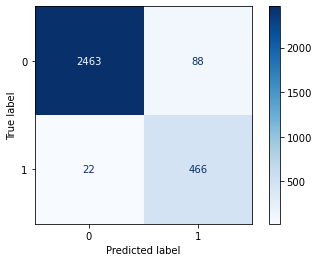

In [32]:
# Classification report and confusion matrix

print(classification_report(y_test, gb_grid.best_estimator_.predict(X_test_scaled)))
print('\n Confusion Matrix')
plot_confusion_matrix(gb_grid, X_test_scaled, y_test, cmap='Blues');

In [33]:
# Cross validation scores

cv_scores = cross_val_score(gb_grid.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('cv_mean:', cv_scores.mean())
print('cv_std:', cv_scores.std())

cv_mean: 0.9677702216931653
cv_std: 0.0029259019791710254


There is no clear improvement after tuning the model. 

ROC_AUC score 0.9924298410780727


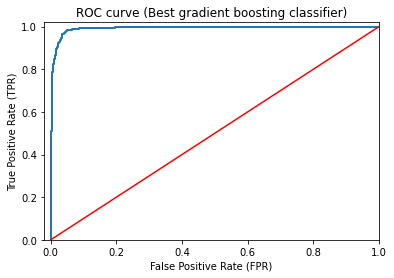

In [34]:
print('ROC_AUC score', roc_auc_score(y_test, gb_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]))

fpr, tpr, threshold = roc_curve(y_test, gb_grid.best_estimator_.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r')
plt.axis([-0.02, 1, 0, 1.02])
plt.xlabel('False Positive Rate (FPR)', fontsize=10)
plt.ylabel('True Positive Rate (TPR)', fontsize=10)
plt.title('ROC curve (Best gradient boosting classifier)');

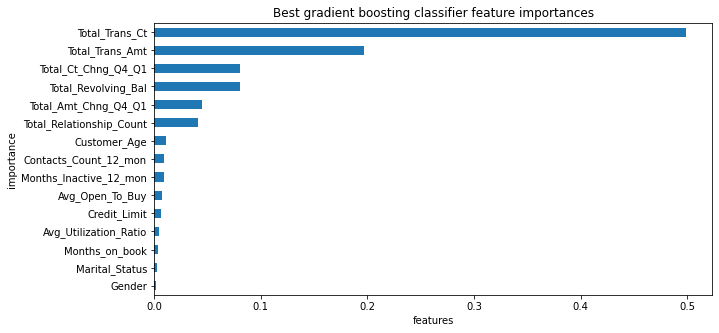

In [35]:
# Plot 15 most important features to predict churn customers

plt.figure(figsize=(10, 5))
imps = gb_grid.best_estimator_.feature_importances_
gb_feat_imps = pd.Series(imps, index=X_train.columns).sort_values()
gb_feat_imps[-15:].plot(kind='barh')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best gradient boosting classifier feature importances');

As expected in the EDA step:
- The most important features to predict churn customers are: Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1.
    
- The categorical features do not have much impact in predicting churn customers.

These features are consistent with the Random Forest Model.

### 7. Conclusion

The two best performing models are the Random Forest and the Gradient Boosting. Both models have the 95% accuracy and 95% recall score. These models can be considered good enough to in predicting churn customers.

These are the most important features to identify a churn customer:
- Total_Trans_Ct
- Total_Trans_Amt
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count
- Total_Amt_Chng_Q4_Q1

The business cannot use any categorical features to predict churn customers since the categorical features have almost no values in identifying customers with high possibility of churning.

The predictive models can be implemented to help identify churn customers in the early stage, so that the business can proactively approach customers with better services turn customers' decisions in the opposite direction.